## Final Project Submission

Please fill out:
* Student name: Htoo Aung Latt
* Student pace: self paced
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


First I will import various libraries and tool I need to scrub and analyze the data.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Removing warning messages
import warnings
warnings.filterwarnings('ignore')

First I will import the data that I will be working with and get familar with it.

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I will copy the description for the columns from the column_names MD document included in the repository.

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** -  Price is prediction target
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Number of bathrooms/bedrooms
* **sqft_living** -  Square footage of the home
* **sqft_lot** - Square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Dealing with NA values

I will further investigate for missing data by looking at the info.

In [3]:
print(df.info())
print(df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The waterfront, view and yr_renovated columns seems to have missing values.
I will take a closer look at each of these columns.

In [4]:
df[['waterfront', 'view', 'yr_renovated']].describe()

,waterfront,view,yr_renovated
count,19221.000000,21534.000000,17755.000000
mean,0.007596,0.233863,83.636778
std,0.086825,0.765686,399.946414
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,1.000000,4.000000,2015.000000


0.0    19075
1.0      146
Name: waterfront, dtype: int64
0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64


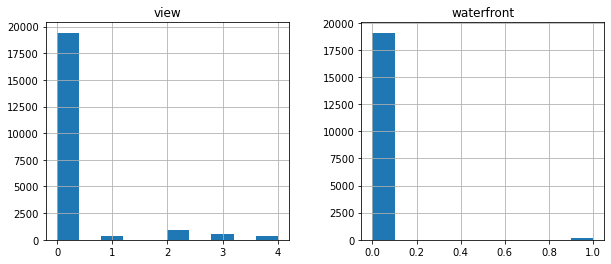

In [5]:
df.hist(column=['waterfront', 'view'], figsize=(10,4))
for col in ['waterfront', 'view']:
    print(df[col].value_counts())

The mode for all three columns is 0 by a large margin. Water front seems to be a binary value, while the other two are categorical. I will first check the percentage of waterfront property before deciding what to do with the na values.

In [6]:
#Checking the percentage of waterfront property.
df_waterfront = df[df['waterfront']==1]
print(len(df_waterfront)/len(df['waterfront'])*100)

0.6760198175672547


Only around .7 percentage of the property is on the waterfront. So I will assume that it is safe to replace the missing data with 0. I will also do the same for view since there are only 63 missing values and the mode of 0 make a large portion of the data.

In [7]:
df['waterfront'] = df['waterfront'].fillna(0.0)
df['view'] = df['view'].fillna(0.0)

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64


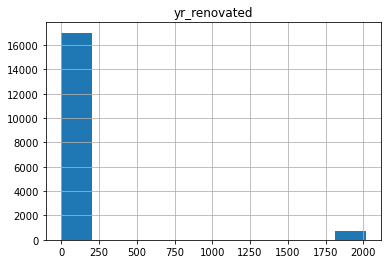

In [8]:
df.hist(column='yr_renovated')
print(df['yr_renovated'].value_counts())

As for the yr_renovated columns, it seems that 0 is a filler value for when the property haven't been renovated at all. I will assume it is safe to fill the na values withe the mode of 0. Since the mode has by far the highest the value count, it  make sense to turn the column in to a binary for renovated and unrenovated property.

In [9]:
print(df['yr_renovated'].value_counts(normalize=True))


0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F722BB9C10>]],
      dtype=object)

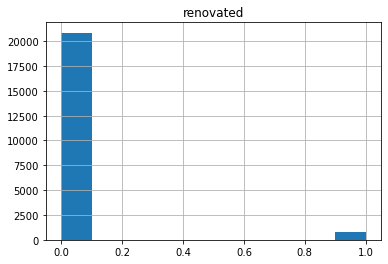

In [10]:
# Fill the na values and change all non zeroes into one
df['yr_renovated'] = df['yr_renovated'].fillna(0.0)
df['yr_renovated'][df['yr_renovated']!= 0] = 1
# I will also rename the column
df = df.rename(columns = {"yr_renovated":"renovated"})
df.hist(column='renovated')

In [11]:
print(df.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


The missing data is dealt with but I still have to deal with the outliers. I will also have to see which columns would make sense to turn into binary columns then split the data between the contionous and categorical datas.

# Dealing with Duplicates, Placeholders and Fillers

In [12]:
# Using the unique identifier column I drop the duplicates, keeping the first.
print(len(df))
print(len(df[df.duplicated(subset='id')]))
df.drop_duplicates(subset='id', inplace=True)
print(len(df))


21597
177
21420


I will print out the top five values in each columns to check for placeholders

In [13]:
for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n' )

id 
 2911700010    0.000047
5450300010    0.000047
5104511600    0.000047
1160000115    0.000047
686530110     0.000047
Name: id, dtype: float64 


date 
 6/23/2014    0.006629
6/25/2014    0.006116
6/26/2014    0.006116
7/8/2014     0.005929
4/27/2015    0.005882
Name: date, dtype: float64 


price 
 350000.0    0.008030
450000.0    0.007983
550000.0    0.007283
500000.0    0.007049
425000.0    0.007003
Name: price, dtype: float64 


bedrooms 
 3    0.454295
4    0.319748
2    0.127731
5    0.074043
6    0.012372
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.249860
1.00    0.177124
1.75    0.140990
2.25    0.094818
2.00    0.089309
Name: bathrooms, dtype: float64 


sqft_living 
 1300    0.006349
1440    0.006209
1400    0.006162
1660    0.005976
1800    0.005976
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.016573
6000    0.013352
4000    0.011625
7200    0.010177
7500    0.005509
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.492624
2.0    0.382960
1.5    

I can see that the sqft_basement  have a value of ? as a placeholder and sixty percent of the columns is equal to zero. It would be a good idea to change the column into a binary value.

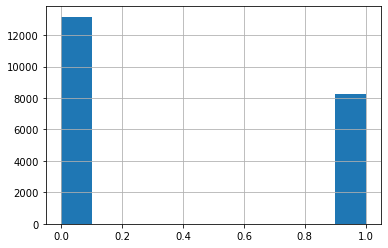

In [14]:
#Change the ? values into 0
df['sqft_basement'][df['sqft_basement']=='?'] = 0
# Change the object type into float
df['sqft_basement'] = df['sqft_basement'].astype(float)
#Change all non zeroes to 1
df['sqft_basement'][df['sqft_basement']!= 0] = 1
# Rename column
df = df.rename(columns = {"sqft_basement":"basement"})



df['basement'].hist()

It seems that specific dates are given for the date sold column. I will group this column into years to make the data simpler.

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['year_sold'] =  pd.DatetimeIndex(df['date']).year
df.drop(columns=['date'], inplace=True)

# Checking the column
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,basement,yr_built,renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,2170,1.0,1951,1.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1050,1.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [16]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

Before we further scrub the data and also create dummies variable for categorical columns, I will create a baseline model and see how well it do.

# 1st Model- The Baseline Model

In [17]:
import statsmodels.api as sm

predictors = df.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df['price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2649.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:37:27   Log-Likelihood:            -2.9195e+05
No. Observations:               21420   AIC:                         5.839e+05
Df Residuals:                   21400   BIC:                         5.841e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.252e+07   6.66e+06     -7.890      0.000   -6.56e+07   -3.95e+07
bedrooms      -3.642e+04   1909.977    -19.069      0.000   -4.02e+04   -3.27e+04
bathrooms      4.251e+04   3298.073     12.889      0.000     3.6e+04     4.9e+04
sqft_living     152.8352      6.020     25.386      0.000     141.035     164.635
sqft_lot          0.1240      0.048      2.588      0.010       0.030       0.218
floors         7845.6340   3607.471      2.175      0.030     774.721    1.49e+04
waterfront     6.186e+05   1.81e+04     34.121      0.000    5.83e+05    6.54e+05
view           5.302e+04   2129.191     24.903      0.000    4.89e+04    5.72e+04
condition      2.853e+04   2364.667     12.065      0.000    2.39e+04    3.32e+04
grade          9.759e+04   2173.428     44.902      0.000    9.33e+04    1.02e+05
sqft_above       27.5085      6.594      4.172      0.000      14.584      40.433
basement      -3231.4428   5085.331     -0.635      0.525   -1.32e+04    6736.186
yr_built      -2633.5866     72.165    -36.494      0.000   -2775.036   -2492.138
renovated      4.935e+04   7959.890      6.200      0.000    3.38e+04     6.5e+04
zipcode        -586.2729     33.160    -17.680      0.000    -651.269    -521.277
lat             6.04e+05   1.08e+04     56.053      0.000    5.83e+05    6.25e+05
long          -2.177e+05   1.32e+04    -16.454      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.2444      3.458      6.144      0.000      14.467      28.021
sqft_lot15       -0.3848      0.073     -5.247      0.000      -0.529      -0.241
year_sold      2.938e+04   2955.074      9.941      0.000    2.36e+04    3.52e+04
==============================================================================
Omnibus:                    18239.756   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1850293.050
Skew:                           3.573   Prob(JB):                         0.00
Kurtosis:                      47.968   Cond. No.                     4.88e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In Statsmodel the model have an adjusted R-squared of 0.701 which is great for the baseline model. The basement column have a very high P value, we will later do a model fit and get rid of some of the variables. The Skewness and Kurtosis is horrible so we would later have to check for heteroskedasticity and normality of residuals.

I will recreate the model in Scikit and see what sort of R_squared we can get.

In [18]:
# Create the model in Scikit
# Import the library to create the model and split data
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df['price']
X = df.drop(['id', 'price'], axis=1)

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Import libraries to get the scores
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


mse = make_scorer(mean_squared_error)
# Create K-fold with 10 splits
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error  :', train_mse)
print('Test Mean Squarred Error   :', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')


Train Mean Squarred Error  : 41441901514.55789
Test Mean Squarred Error   : 36375428440.19045
R-squared                    = 0.6999076059182942
Mean Squared Error using CV  = 40676065046.83171


The R-squared is slightly less than it was in Statsmodel. The MSE is actually lower for the test data, which is quiet rare.

In [19]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'basement', 'yr_built', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year_sold'],
      dtype='object')

Next I will check weather the variables have a linear relationship with the target.
# Checking Linearity

In [20]:
columns_check = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'basement', 'yr_built', 'renovated','sqft_living15', 'sqft_lot15', 'year_sold']

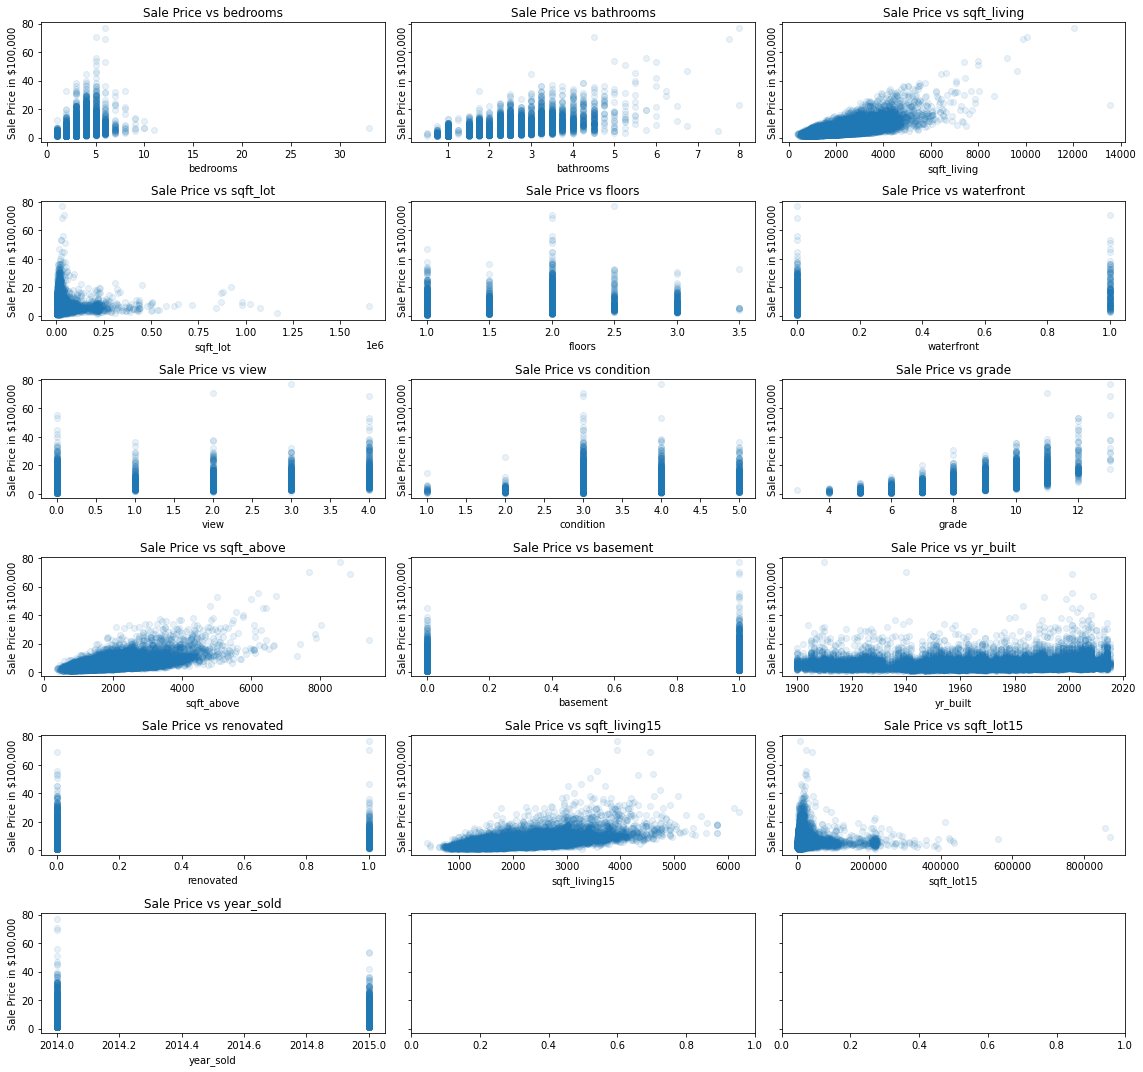

In [21]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), columns_check):
    ax.scatter(df[column], df['price'] / 100_000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()

In [22]:
print(df['sqft_lot'].min())
print(df['sqft_lot15'].min())

520
651


Among the continous data the linearity seems good enough. Although at first sqft_lot and sqft_lot15 seems to use 0 as a placeholder for not having a lot after checking the min values we see that is not the case. Since sqft_lot and sqft_lot15 doesn't seems to have a linear relationship with sale price, I will drop these columns.

I can also see that several data have extreme outliers that will have to be dealt with.

In [23]:
df.drop(['sqft_lot', 'sqft_lot15'], axis=1, inplace=True)


# Question - How will dealing with multicollinearity and creating dummy variables change the model R-squared?

##  Multicollinearity and Categorical Data.

Before we create dummies variables for the categorical data I will find which variables have high multicollinearity.

In [24]:
df_cor = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cor
df_cor['pairs'] = list(zip(df_cor.level_0, df_cor.level_1))

df_cor.set_index(['pairs'], inplace = True)

df_cor.drop(columns=['level_1', 'level_0'], inplace = True)

#cc for correlation coefficient
df_cor.columns = ['cc']
df_cor.drop_duplicates(inplace=True)
df_cor[(df_cor.cc>.75) & (df_cor.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876533
"(sqft_living, grade)",0.762477
"(sqft_above, grade)",0.756221
"(sqft_living, sqft_living15)",0.756186
"(bathrooms, sqft_living)",0.755522


I will get rid of the sqft_above column as this would get rid of the 0.87 correlation between the home square footage(sqft_living) and above ground footage(sqft_above). The correlation between grade and sqft_above would also be gone, leaving us with 3 correlations with a coefficient just slightly above 0.75.

In [25]:
df.drop(columns=['sqft_above'], inplace = True)

#Check the correlation again
df_cor = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df_cor
df_cor['pairs'] = list(zip(df_cor.level_0, df_cor.level_1))

df_cor.set_index(['pairs'], inplace = True)

df_cor.drop(columns=['level_1', 'level_0'], inplace = True)
df_cor.columns = ['cc']
df_cor.drop_duplicates(inplace=True)
df_cor[(df_cor.cc>.75) & (df_cor.cc<1)]

,cc
pairs,
"(sqft_living, grade)",0.762477
"(sqft_living, sqft_living15)",0.756186
"(bathrooms, sqft_living)",0.755522


Next we will see what type of data is in each column. We do this by plotting a scatter plot against our target for each column.

<bound method Figure.tight_layout of <Figure size 1152x1008 with 16 Axes>>

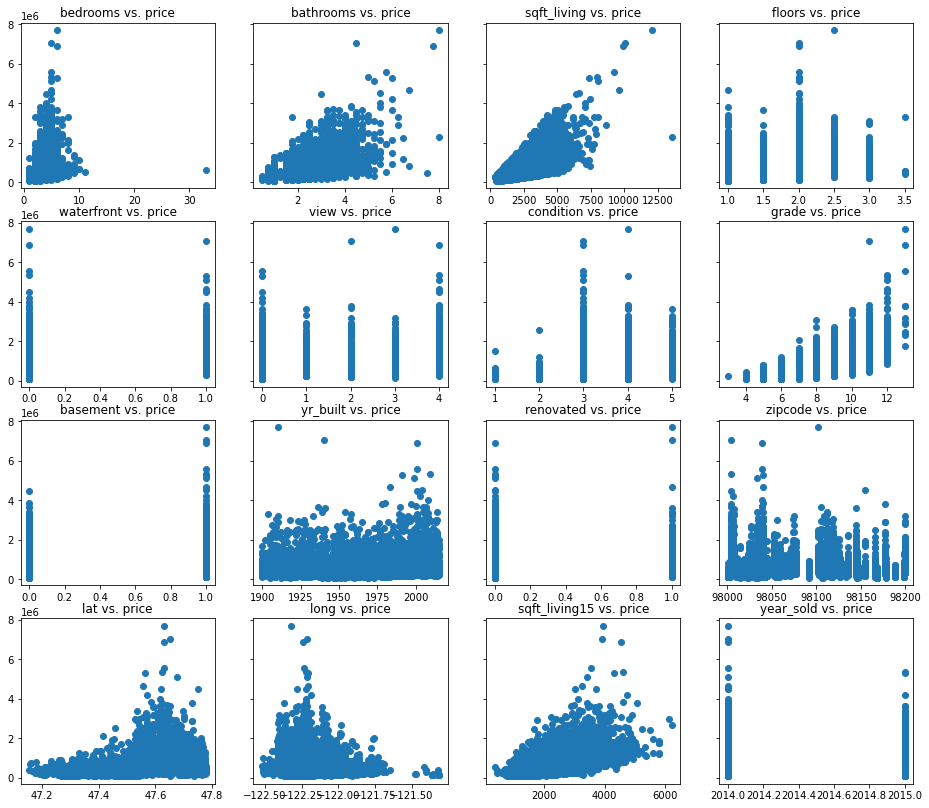

In [26]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16,14), sharey=True)
columns_plot = df.drop(['id', 'price'], axis=1).columns
for col, ax in zip(columns_plot, ax.flatten()):
    ax.scatter(df[col], df['price'])
    ax.set_title(f'{col} vs. price')
fig.tight_layout

The clear cut continous data are sqft_living and sqft_living15.

The variables bedrooms, bathrooms, floors, condition, grade, yr_built and year_sold can be classify ordinal data have a hierarchical order, I don't believe there is a need to create dummy variables for them.

I have already previously change the renovated and basement columns into binary data so there is no need to create dummy variables for them either along with the waterfront column. 

That leaves the zipcode, latitude and longitude columns. Since all three columns deals with location, I will get rid of the latitude and longitude columns.




In [27]:
# Drop the latitude and longitude columns.
df.drop(['long', 'lat'], axis=1, inplace=True)
print(f'Num of unique zipcodes: {df.zipcode.nunique()}')
print(f'Zipcod Max Value      : {df.zipcode.max()}')
print(f'Zipcod Min Value      : {df.zipcode.min()}')


Num of unique zipcodes: 70
Zipcod Max Value      : 98199
Zipcod Min Value      : 98001


Although I originally tried to bin the zipcodes into equal parts of 10 groups, the model build from it had a horrible R-squared and keeps getting worse. So I have believe that the best method is to just create 70 diffrent dummy variables for the zipcodes. If I wanted to decrease the number of features, I could bin the zipcodes by counties but finding this info was difficult.

In [28]:
df2 = df.copy()
# Create dummy variables, drop 1 column to avoid multicollinearity. This column will be accounted for in the intercept
zipcode_dummies = pd.get_dummies(df2['zipcode'], prefix = 'zip', drop_first=True)

# Drop the zipcode column
df2.drop(columns=['zipcode'], inplace=True)

# Adding the zipcode dummy variables
df2 = pd.concat([df2, zipcode_dummies], axis=1)

# Checking if the new columns have been added. Now there are 86 columns
df2.head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,7129300520,221900.0,3,1.00,1180,1.0,0.0,0.0,3,7,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3,2.25,2570,2.0,0.0,0.0,3,7,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,1.0,0.0,0.0,3,6,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,1.0,0.0,0.0,5,7,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,1.0,0.0,0.0,3,8,...,0,0,0,0,0,0,0,0,0,0


# 2nd Model after dealing with multicollinearity and categorical data.

Now that we have gotten rid of some columns and created dummy variables for zip code let try to create the model again.

In [29]:
predictors = df2.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df2['price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     1096.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:37:39   Log-Likelihood:            -2.8722e+05
No. Observations:               21420   AIC:                         5.746e+05
Df Residuals:                   21337   BIC:                         5.753e+05
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.818e+07   4.79e+06    -12.138      0.000   -6.76e+07   -4.88e+07
bedrooms      -2.823e+04   1550.369    -18.210      0.000   -3.13e+04   -2.52e+04
bathrooms      2.598e+04   2669.907      9.732      0.000    2.07e+04    3.12e+04
sqft_living     192.0039      2.775     69.193      0.000     186.565     197.443
floors        -3.617e+04   3052.550    -11.848      0.000   -4.21e+04   -3.02e+04
waterfront     6.844e+05   1.48e+04     46.322      0.000    6.55e+05    7.13e+05
view           5.363e+04   1739.211     30.836      0.000    5.02e+04     5.7e+04
condition      2.477e+04   1937.640     12.784      0.000     2.1e+04    2.86e+04
grade          6.266e+04   1814.314     34.537      0.000    5.91e+04    6.62e+04
basement      -5.542e+04   2826.965    -19.605      0.000    -6.1e+04   -4.99e+04
yr_built       -785.2792     64.593    -12.157      0.000    -911.887    -658.672
renovated      3.666e+04   6435.695      5.696      0.000     2.4e+04    4.93e+04
sqft_living15    13.3443      2.893      4.612      0.000       7.673      19.015
year_sold      2.939e+04   2378.406     12.356      0.000    2.47e+04     3.4e+04
zip_98002      2.544e+04   1.44e+04      1.770      0.077   -2723.961    5.36e+04
zip_98003     -2.016e+04    1.3e+04     -1.557      0.120   -4.55e+04    5227.195
zip_98004      7.662e+05   1.27e+04     60.505      0.000    7.41e+05    7.91e+05
zip_98005      2.942e+05   1.53e+04     19.276      0.000    2.64e+05    3.24e+05
zip_98006       2.54e+05   1.15e+04     22.178      0.000    2.32e+05    2.76e+05
zip_98007      2.364e+05   1.62e+04     14.592      0.000    2.05e+05    2.68e+05
zip_98008      2.443e+05   1.29e+04     18.921      0.000    2.19e+05     2.7e+05
zip_98010      7.338e+04   1.84e+04      3.996      0.000    3.74e+04    1.09e+05
zip_98011      1.203e+05   1.44e+04      8.339      0.000    9.21e+04    1.49e+05
zip_98014      1.127e+05   1.69e+04      6.668      0.000    7.96e+04    1.46e+05
zip_98019      9.206e+04   1.45e+04      6.337      0.000    6.36e+04    1.21e+05
zip_98022     -5533.0372   1.37e+04     -0.405      0.685   -3.23e+04    2.12e+04
zip_98023     -3.564e+04   1.12e+04     -3.171      0.002   -5.77e+04   -1.36e+04
zip_98024      1.682e+05   2.01e+04      8.365      0.000    1.29e+05    2.08e+05
zip_98027      1.674e+05   1.18e+04     14.229      0.000    1.44e+05     1.9e+05
zip_98028      1.141e+05   1.29e+04      8.862      0.000    8.89e+04    1.39e+05
zip_98029      2.048e+05   1.25e+04     16.352      0.000     1.8e+05    2.29e+05
zip_98030      1803.1636   1.33e+04      0.136      0.892   -2.42e+04    2.78e+04
zip_98031      1.077e+04    1.3e+04      0.828      0.408   -1.47e+04    3.63e+04
zip_98032      3144.3671   1.69e+04      0.186      0.852      -3e+04    3.63e+04
zip_98033      3.606e+05   1.16e+04     31.088   

The Adjusted R-Squared increased a lot. The skewness and kurtosis are better. First I will create this model again in Scikit.

In [30]:
y = df2['price']
X = df2.drop(['id', 'price'], axis=1)

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
mse = make_scorer(mean_squared_error)

# Create K-fold with 10 splits
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:  ', train_mse)
print('Test Mean Squarred Error:   ', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')



Train Mean Squarred Error:   26741604232.210163
Test Mean Squarred Error:    23168871217.363934
R-squared                    = 0.8056690583560636
Mean Squared Error using CV  = 26399134347.101


Again we see that the R-squared got better and the MSE for the test data is actually less than the training data.

Next I will try to log transform and normalize the continous variables to see if that can improve the model.

## Answer - Creating the dummy variables for zipcodes improved Adjusted R-squared alot.

# Question - Will removing outliers improve the model?

In [31]:
continous_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'condition', 'grade', 
           'sqft_living15', 'price']
for col in continous_columns:
    print(col)
    print(df2[col].quantile([.0, .01, .02, .03, .04, .05, .95, .96, .97, .98, .99, 1]), '\n\n')

bedrooms
0.00     1.0
0.01     2.0
0.02     2.0
0.03     2.0
0.04     2.0
0.05     2.0
0.95     5.0
0.96     5.0
0.97     5.0
0.98     5.0
0.99     6.0
1.00    33.0
Name: bedrooms, dtype: float64 


bathrooms
0.00    0.50
0.01    1.00
0.02    1.00
0.03    1.00
0.04    1.00
0.05    1.00
0.95    3.50
0.96    3.50
0.97    3.50
0.98    3.75
0.99    4.25
1.00    8.00
Name: bathrooms, dtype: float64 


sqft_living
0.00      370.0
0.01      720.0
0.02      790.0
0.03      850.0
0.04      900.0
0.05      940.0
0.95     3770.0
0.96     3930.0
0.97     4140.0
0.98     4410.0
0.99     4980.0
1.00    13540.0
Name: sqft_living, dtype: float64 


floors
0.00    1.0
0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.05    1.0
0.95    2.0
0.96    2.0
0.97    2.5
0.98    3.0
0.99    3.0
1.00    3.5
Name: floors, dtype: float64 


condition
0.00    1.0
0.01    3.0
0.02    3.0
0.03    3.0
0.04    3.0
0.05    3.0
0.95    5.0
0.96    5.0
0.97    5.0
0.98    5.0
0.99    5.0
1.00    5.0
Name: condition, dtype

Looking at the Max and Min quantile, I can see that there are quiet a few outliers. I will use the IQR method to remove outliers from all the continous data.


In [32]:
# #Drop the absolute extreme outliers.
df3 = df2.copy()

Q1 = df3.quantile(0.25)
Q3 = df3.quantile(0.75)
IQR = Q3 - Q1
lower_range = Q1-(1.5*IQR)
upper_range = Q3+(1.5*IQR)
for col in continous_columns:
    df3[col] = df3[col].map(lambda x: None if x > upper_range[col] else x)
    df3[col] = df3[col].map(lambda x: None if x < lower_range[col] else x)

# dropping rows with null values
df3 = df3.dropna()

In [33]:
for col in continous_columns:
    print(col)
    print(df3[col].quantile([.0, .01, .02, .03, .04, .05, .95, .96, .97, .98, .99, 1]), '\n\n')

bedrooms
0.00    2.0
0.01    2.0
0.02    2.0
0.03    2.0
0.04    2.0
0.05    2.0
0.95    5.0
0.96    5.0
0.97    5.0
0.98    5.0
0.99    5.0
1.00    5.0
Name: bedrooms, dtype: float64 


bathrooms
0.00    0.75
0.01    1.00
0.02    1.00
0.03    1.00
0.04    1.00
0.05    1.00
0.95    3.00
0.96    3.00
0.97    3.25
0.98    3.50
0.99    3.50
1.00    3.50
Name: bathrooms, dtype: float64 


sqft_living
0.00     560.0
0.01     770.0
0.02     830.0
0.03     880.0
0.04     920.0
0.05     960.0
0.95    3120.0
0.96    3200.0
0.97    3291.5
0.98    3420.0
0.99    3640.0
1.00    4230.0
Name: sqft_living, dtype: float64 


floors
0.00    1.0
0.01    1.0
0.02    1.0
0.03    1.0
0.04    1.0
0.05    1.0
0.95    2.0
0.96    2.0
0.97    2.5
0.98    3.0
0.99    3.0
1.00    3.5
Name: floors, dtype: float64 


condition
0.00    2.0
0.01    3.0
0.02    3.0
0.03    3.0
0.04    3.0
0.05    3.0
0.95    5.0
0.96    5.0
0.97    5.0
0.98    5.0
0.99    5.0
1.00    5.0
Name: condition, dtype: float64 


grade
0.00 

# 3rd model after removing outliers

### Answer - Removing the outliers also slightly improved R-squared. Next I wil try log transforming and scaling the data.


# Question-  Will log transforming and scaling the continous data create a better fit?

First I will create a distplot to find the distribrution of the continous data. I will create a kde graph with smoothing to plot the other numerical columns.

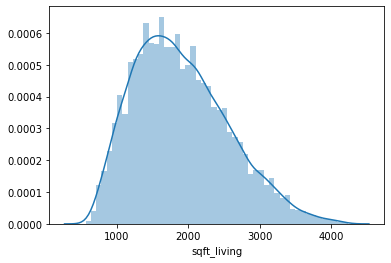

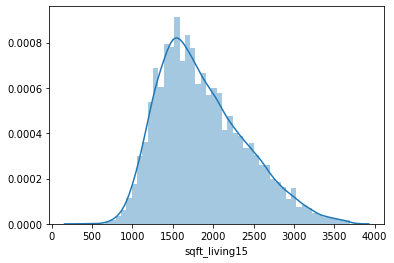

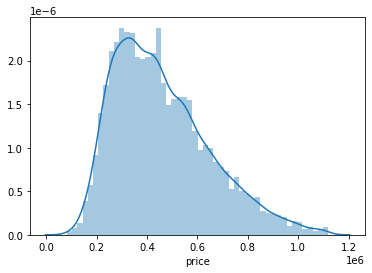

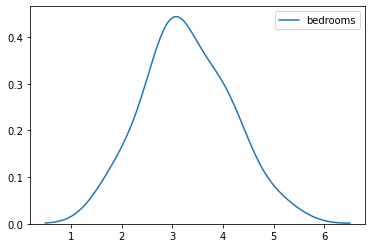

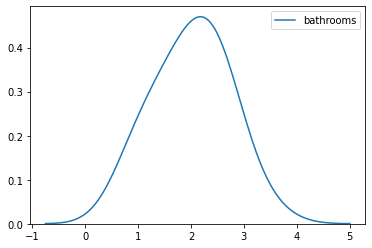

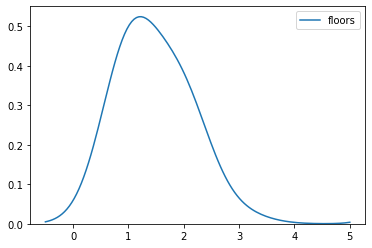

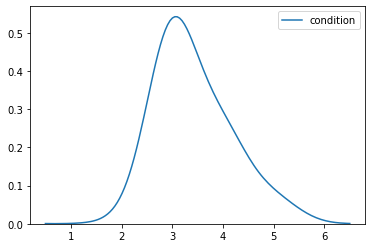

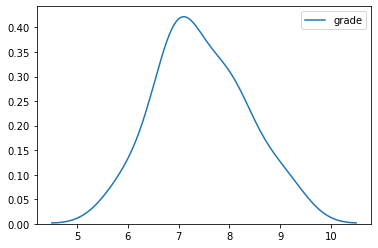

<Figure size 432x288 with 0 Axes>

In [34]:
continous_data = ['sqft_living', 'sqft_living15', 'price']
kde_plt = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']
          
for col in continous_data:    
    sns.distplot(df3[col], label=col)
    plt.figure()

for col in kde_plt:
    sns.kdeplot(df3[col], bw=0.5)
    plt.figure()

All five continous data seems to be skewed to the right. The rest of the columns seems to be fine, with just slight skewnees.

In [35]:
log_normalize_df = df3.copy()

In [36]:
non_normal = ['sqft_living', 'sqft_living15', 'price']
for col in non_normal:
    log_normalize_df[col] = log_normalize_df[col].map(lambda x: np.log(x))

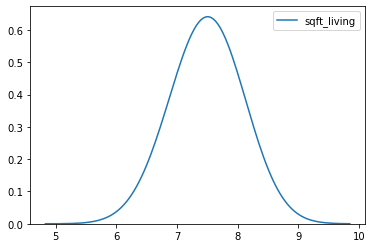

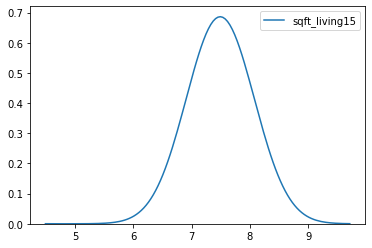

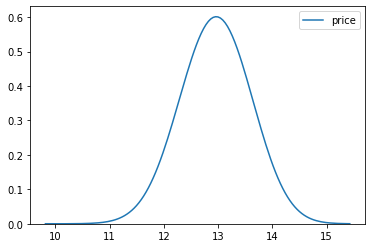

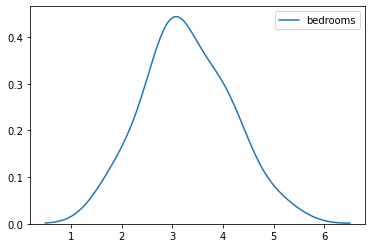

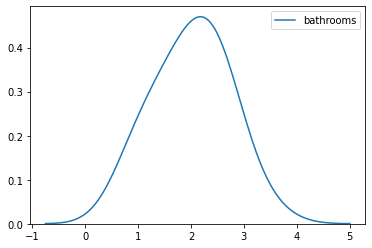

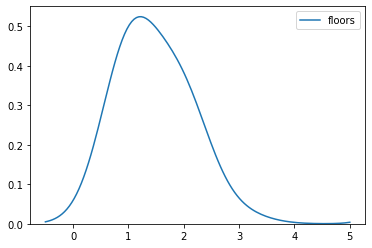

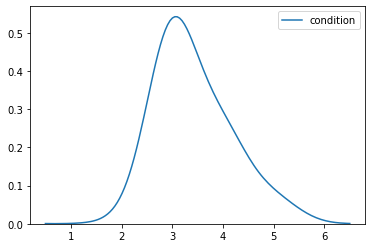

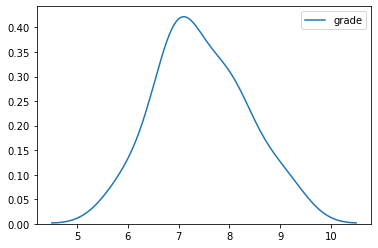

<Figure size 432x288 with 0 Axes>

In [37]:
for col in continous_data:    
    sns.kdeplot(log_normalize_df[col], bw=0.5)
    plt.figure()

for col in kde_plt:
    sns.kdeplot(log_normalize_df[col], bw=0.5)
    plt.figure()

All the data seems closer to being normally distribruted now. Next I will rename the columns to make sure which are logs and then scale all the data.

# Scaling with Normalization

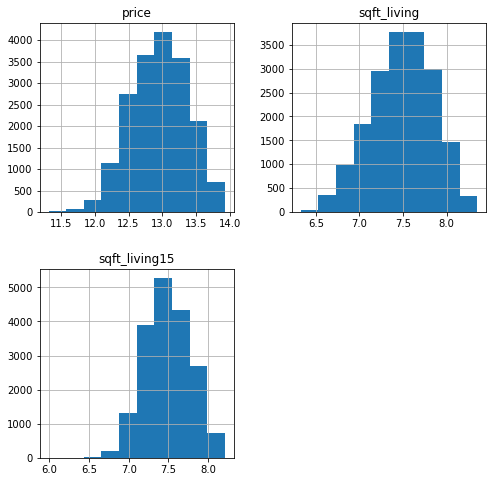

In [38]:
to_scale = ['sqft_living', 'sqft_living15', 'price']
log_normalize_df[to_scale].hist(figsize  = [8, 8]);


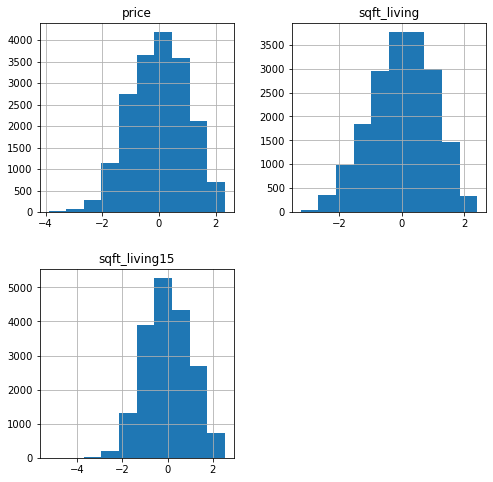

In [39]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

for col in to_scale:
    log_normalize_df[col] = normalize(log_normalize_df[col])
# Rename the columns so it is clear the data is log-transform and scaled.    
log_normalize_df[to_scale].hist(figsize  = [8, 8]);

log_normalize_df.rename(columns={'sqft_living': 'nl_sqft_living', 'sqft_lot': 'nl_sqft_lot', 'sqft_living15': 'nl_sqft_living15', 
                    'sqft_lot15': 'nl_sqft_lot15', 'price': 'nl_price'}, inplace=True)

The data is now scaled with normalization method. Now we will build the model again and see how it peforms.
# 4th Model after log transforming and normalization

In [40]:
predictors = log_normalize_df.drop(['nl_price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(log_normalize_df['nl_price'],predictors_int.astype(float)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               nl_price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1146.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:37:51   Log-Likelihood:                -9518.4
No. Observations:               18496   AIC:                         1.920e+04
Df Residuals:                   18413   BIC:                         1.985e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             -230.0082     12.958    -17.751      0.000    -255.406    -204.610
bedrooms            -0.0280      0.005     -5.522      0.000      -0.038      -0.018
bathrooms            0.0692      0.008      8.737      0.000       0.054       0.085
nl_sqft_living       0.3623      0.006     58.697      0.000       0.350       0.374
floors              -0.0556      0.009     -6.536      0.000      -0.072      -0.039
waterfront           0.9131      0.067     13.607      0.000       0.782       1.045
view                 0.1332      0.005     24.380      0.000       0.123       0.144
condition            0.1157      0.005     21.749      0.000       0.105       0.126
grade                0.2252      0.006     39.148      0.000       0.214       0.236
basement            -0.1153      0.008    -14.506      0.000      -0.131      -0.100
yr_built            -0.0018      0.000    -10.122      0.000      -0.002      -0.001
renovated            0.1443      0.018      7.813      0.000       0.108       0.180
nl_sqft_living15     0.1243      0.005     26.060      0.000       0.115       0.134
year_sold            0.1145      0.006     17.806      0.000       0.102       0.127
zip_98002           -0.0542      0.038     -1.437      0.151      -0.128       0.020
zip_98003            0.0004      0.034      0.011      0.992      -0.065       0.066
zip_98004            2.4382      0.041     60.093      0.000       2.359       2.518
zip_98005            1.7356      0.042     41.555      0.000       1.654       1.817
zip_98006            1.4727      0.032     46.372      0.000       1.410       1.535
zip_98007            1.4742      0.044     33.463      0.000       1.388       1.561
zip_98008            1.4756      0.034     43.771      0.000       1.410       1.542
zip_98010            0.6075      0.050     12.215      0.000       0.510       0.705
zip_98011            1.0301      0.037     27.482      0.000       0.957       1.104
zip_98014            0.8697      0.046     18.892      0.000       0.779       0.960
zip_98019            0.7963      0.038     21.007      0.000       0.722       0.871
zip_98022            0.1750      0.035      4.957      0.000       0.106       0.244
zip_98023           -0.1024      0.029     -3.526      0.000      -0.159      -0.045
zip_98024            1.0981      0.055     19.974      0.000       0.990       1.206
zip_98027            1.2364      0.032     38.918      0.000       1.174       1.299
zip_98028            0.9439      0.033     28.432      0.000       0.879       1.009
zip_98029            1.3885      0.033     42.285      0.000       1.324       1.453
zip_98030            0.0830      0.034      2.436      0.015       0.016       0.150
zip_98031            0.1297      0.033      3.886      0.000       0.064       0.195
zip_98032           -0.

In [41]:
y = log_normalize_df['nl_price']
X = log_normalize_df.drop(['id', 'nl_price'], axis=1)

# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)


# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:  ', train_mse)
print('Test Mean Squarred Error:   ', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')



Train Mean Squarred Error:   0.1625239192731309
Test Mean Squarred Error:    0.1701691169784822
R-squared                    = 0.8345465225550253
Mean Squared Error using CV  = 0.16541029586818354


The R-squared improved by quiet a lot from the third model. The skewness have improve but kurtosis is still quiet large.


### Answer - Performing log transformation and scaling with normalization of the data gave us a better performing model. The Adjusted R-squared improve but I will keep working with the orignal data because I want the ability to interpret the coefficients of the final model.

# Model Fitting

## Stepwise selection with P-value

First I will try doing a stepwise selection to see if there are features I should get rid of.

In [42]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

predictors = df2.drop(['price','id'], axis=1)

result = stepwise_selection(predictors, df2['price'], initial_list=['zip_98002', 'zip_98003', 'zip_98004',
       'zip_98005', 'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010',
       'zip_98011', 'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023',
       'zip_98024', 'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030',
       'zip_98031', 'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038',
       'zip_98039', 'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052',
       'zip_98053', 'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105',
       'zip_98106', 'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112',
       'zip_98115', 'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119',
       'zip_98122', 'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136',
       'zip_98144', 'zip_98146', 'zip_98148', 'zip_98155', 'zip_98166',
       'zip_98168', 'zip_98177', 'zip_98178', 'zip_98188', 'zip_98198',
       'zip_98199'], verbose=True)
print('resulting features:')
print(result)

# Question- Will limiting the amount of features improve the model?

In [43]:
len(df3.columns)-1

83

In [44]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

predictors = df3.drop(['price','id'], axis=1)

Adjusted_R_squared = []
No_of_features = []

linreg = LinearRegression()
for i in range(1,len(df3.columns)-1):
    selector = RFE(linreg, n_features_to_select=i)
    selector = selector.fit(predictors, df3['price'])

    #Fit the model with selected columns
    selected_columns = X.columns[selector.support_ ]
    linreg.fit(X[selected_columns],y)
    # Predict y_hat
    yhat = linreg.predict(X[selected_columns])
    SS_Residual = np.sum((y-yhat)**2)
    SS_Total = np.sum((y-np.mean(y))**2)
    r_squared = 1 - (float(SS_Residual))/SS_Total
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
    
    Adjusted_R_squared.append(adjusted_r_squared)
    No_of_features.append(i)
    print(i)
    


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82


Text(0, 0.5, 'Adjusted R-squared')

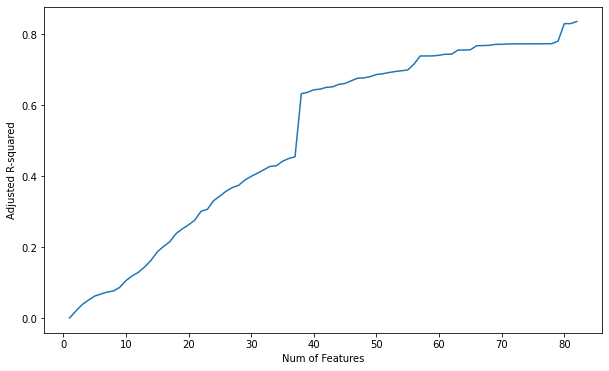

In [45]:
fig = plt.figure(figsize=(10,6))
plt.plot(No_of_features, Adjusted_R_squared)
plt.xlabel('Num of Features')
plt.ylabel('Adjusted R-squared')

### Answer - Limiting the number of features using RFE made the model a lot worse.

Next I will check the normality of the residuals and the homoscedasticity of the data.

# Checking Assumptions
## Normality and Homoscedasticity Check

Next I will run a qqplot on the model residuals and a Breush-Pagan Test to check the regression assumptions.

<Figure size 1080x576 with 0 Axes>

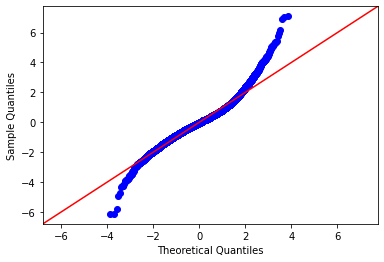

[('F statistic', 0.9663439591468717), ('p-value', 0.949358303484672)]

In [46]:
predictors = df3.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df3['price'],predictors_int.astype(float)).fit()
model.summary()

plt.show()
fig = plt.figure(figsize=(15,8))
# fig = sm.graphics.plot_regress_exog(model, val, fig=fig)
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)
    
plt.show()

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
list(zip(name, test))

Since both the qq-plot does't see that good I will first drop zipcodes columns with small values since that can throw off the predictions. I will also get rid of the zipcodes having high p-values.

In [47]:
df['zipcode'].value_counts().tail(30)

98112    268
98168    264
98107    264
98136    263
98055    260
98178    258
98177    254
98030    253
98166    250
98022    233
98105    229
98045    218
98002    197
98077    196
98011    194
98019    190
98108    185
98119    184
98005    168
98007    139
98188    135
98014    123
98032    123
98070    116
98109    109
98102    104
98010     99
98024     79
98148     56
98039     49
Name: zipcode, dtype: int64

In [48]:
df4 =df3.copy()
df4.drop(['zip_98039', 'zip_98148', 'zip_98024', 'zip_98010', 'zip_98102', 'zip_98109', 'zip_98070', 'zip_98045', 'zip_98032', 'zip_98010', 'zip_98188', 'zip_98007','zip_98019',
          'zip_98106', 'zip_98108', 'zip_98146', 'zip_98019', 'zip_98011', 'zip_98077', 'zip_98002' ], axis=1, inplace=True)

Since the purpose of this model is for inference, I do not want to transforms or scale the data.

# Final Model

In [49]:
predictors = df4.drop(['price','id'], axis=1)
predictors_int = sm.add_constant(predictors)

model = sm.OLS(df4['price'],predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     1022.
Date:                Thu, 05 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:39:53   Log-Likelihood:            -2.3713e+05
No. Observations:               18496   AIC:                         4.744e+05
Df Residuals:                   18431   BIC:                         4.749e+05
Df Model:                          64                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.156e+07   2.86e+06    -14.531      0.000   -4.72e+07    -3.6e+07
bedrooms      -6811.2821   1100.645     -6.188      0.000   -8968.648   -4653.916
bathrooms      1.562e+04   1725.073      9.056      0.000    1.22e+04     1.9e+04
sqft_living      96.3578      1.962     49.113      0.000      92.512     100.203
floors         4421.9039   1838.930      2.405      0.016     817.431    8026.377
waterfront     1.727e+05   1.45e+04     11.891      0.000    1.44e+05    2.01e+05
view           3.055e+04   1203.509     25.383      0.000    2.82e+04    3.29e+04
condition      2.119e+04   1165.447     18.184      0.000    1.89e+04    2.35e+04
grade          5.454e+04   1258.734     43.332      0.000    5.21e+04     5.7e+04
basement      -1.155e+04   1693.177     -6.823      0.000   -1.49e+04   -8234.504
yr_built       -937.4130     38.767    -24.181      0.000   -1013.399    -861.427
renovated      2.965e+04   4069.087      7.286      0.000    2.17e+04    3.76e+04
sqft_living15    40.9522      1.976     20.725      0.000      37.079      44.825
year_sold      2.138e+04   1419.060     15.064      0.000    1.86e+04    2.42e+04
zip_98003     -1.112e+05   5850.120    -19.004      0.000   -1.23e+05   -9.97e+04
zip_98004      3.915e+05   7711.769     50.766      0.000    3.76e+05    4.07e+05
zip_98005      2.125e+05   8022.935     26.484      0.000    1.97e+05    2.28e+05
zip_98006       1.47e+05   5341.782     27.512      0.000    1.36e+05    1.57e+05
zip_98008      1.257e+05   5891.389     21.331      0.000    1.14e+05    1.37e+05
zip_98014      2.207e+04   9109.140      2.423      0.015    4216.242    3.99e+04
zip_98022     -9.175e+04   6343.322    -14.465      0.000   -1.04e+05   -7.93e+04
zip_98023     -1.273e+05   4534.723    -28.069      0.000   -1.36e+05   -1.18e+05
zip_98027      7.747e+04   5348.539     14.484      0.000     6.7e+04     8.8e+04
zip_98028      1.862e+04   5758.020      3.234      0.001    7336.856    2.99e+04
zip_98029      1.124e+05   5655.603     19.880      0.000    1.01e+05    1.24e+05
zip_98030      -1.01e+05   6023.491    -16.764      0.000   -1.13e+05   -8.92e+04
zip_98031     -9.642e+04   5821.658    -16.562      0.000   -1.08e+05    -8.5e+04
zip_98033      2.009e+05   5222.176     38.463      0.000    1.91e+05    2.11e+05
zip_98034      7.454e+04   4394.240     16.964      0.000    6.59e+04    8.32e+04
zip_98038      -6.36e+04   4260.783    -14.927      0.000    -7.2e+04   -5.52e+04
zip_98040      3.018e+05   8005.458     37.693      0.000    2.86e+05    3.17e+05
zip_98042      -9.42e+04   4344.961    -21.680      0.000   -1.03e+05   -8.57e+04
zip_98052      1.399e+05   4453.136     31.417      0.000    1.31e+05    1.49e+05
zip_98053      1.398e+05   5469.668     25.560      0.000    1.29e+05    1.51e+05
zip_98055     -7.503e+04   6094.893    -12.311   

In [50]:
y = df4['price']
X = df4.drop(['id', 'price'], axis=1)
# Split data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

# Fit the model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
mse = make_scorer(mean_squared_error)

# Create K-fold with 10 splits
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)

# Find R-squared and MSE
rsquared = np.mean(cross_val_score(linreg, X, y, scoring='r2', cv=crossvalidation))
cv_10_results = cross_val_score(linreg, X, y, cv=crossvalidation, scoring=mse)

#Predict data
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
#Calculate two diffrent MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:  ', train_mse)
print('Test Mean Squarred Error:   ', test_mse)

print(f'R-squared                    = {rsquared}')
print(f'Mean Squared Error using CV  = {cv_10_results.mean()}')


Train Mean Squarred Error:   8037878159.230583
Test Mean Squarred Error:    7913772633.596294
R-squared                    = 0.7782639782163268
Mean Squared Error using CV  = 8064759560.937549


The R-squared and MSE of the model got worse than the fourth model but since the features violate an assumption I have no choice but to leave them out and settle for the worse scores.

# The Final Multiple Linear Regression Model
### Steps taken to arrive at final model.
1. Get rid of duplicates and then replace missing and placeholder values with the mode.
2. Change columns that uses 0 as placeholder into binary values.
3. Check for linear relationship assumption.
4. Deal with variables having multicollinearity.
5. Create Dummy Variables for categorical data.
6. Remove outliers from the data.
7. Log transform non-normal continous data and scaled with normalization method.
8. Perform Model Fitting using both RFE and Stepwise Selection.
9. Check distribrution of residuals for normality and heteroskedasticity.

### Interpreting the Model

For the final model I have 13 continous and ordinal data variables and 51 categorical zip codes variables. From the coefficients we can infer that adding 1 bathroom increase about \\$15,620 dollar to the property value. 1 squarefoot is around \\$96 dollars. Condition and grade have a coeffient of \\$21,190 and \\$54,540 respectively. Renovated properties are typically \\$29,650 more expensive.

The zipcodes with the highest prices are:

    98004     City: Bellevue            Neighbourhood:  Bellevue Square / Downtown

    98005     City: Bellevue            Neighbourhood:  Wilburton

    98033     City: Kirkland            Neighbourhood:  

    98040     City: Mercer Island       Neighbourhood:  
    
    98105     City: Seattle             Neighbourhood:  University District

    98112     City: Seattle             Neighbourhood:  Mann / Central Area

    98119     City: Seattle             Neighbourhood:  West Queen Anne / Queen Anne

    98199     City: Seattle             Neighbourhood:  Southeast Magnolia / Magnolia

In [51]:
 max(y_hat_train)

1033054.9850452989

Text(0.5, 1.0, 'Model vs Train Set Data')

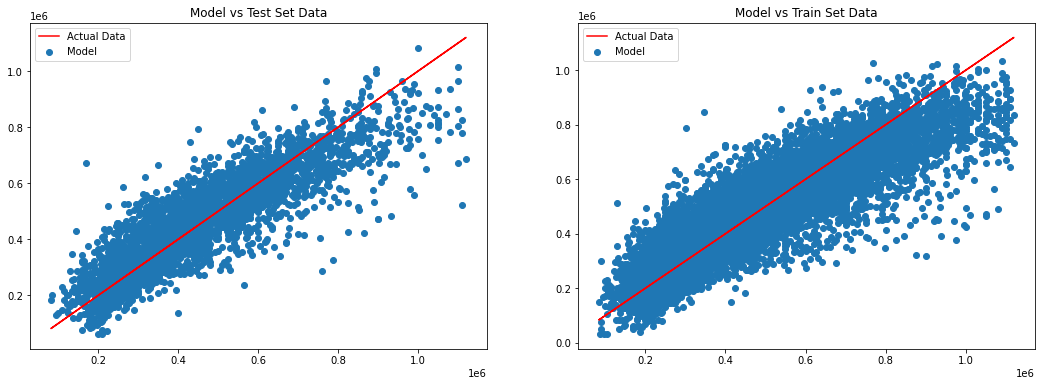

In [52]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
ax[0].scatter(y_test, y_hat_test, label='Model')
ax[0].plot(y_test, y_test, color='red', label='Actual Data')
ax[0].legend()
ax[0].set_title('Model vs Test Set Data')

ax[1].scatter(y_train, y_hat_train, label='Model')
ax[1].plot(y_train, y_train, color='red', label='Actual Data')
ax[1].legend()
ax[1].set_title('Model vs Train Set Data')

# Further Improvement I can make for the model.

I believe the best improvement I can make to the model is to limit the number of variables and make the model simpler by grouping the zipcodes into cities or school district to get a better idea of which neighborhoods are higher priced.

If the model is to be used to predict rather than for inference, I would transform and scale the data so that it performs better.
